In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scripts.metric as metric
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### Get the data and pre-process the data

In [3]:
df = pd.read_csv('../data/data_ready_year_trans.csv')
df.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.955827,10.366309,1,1,6,5,7.581210,7.581210,4.727388,3,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.360741,1,1,5,6,7.581720,7.581720,0.000000,3,...,0,0,0,1,0,0,0,0,1,0
2,4.406719,9.565775,1,1,6,6,7.580189,7.580189,4.691348,3,...,0,0,0,1,0,0,0,0,1,0
3,4.543295,9.320181,1,1,7,5,7.585281,7.585281,0.000000,4,...,0,0,0,1,0,0,0,0,1,0
4,4.317488,9.534668,1,1,5,5,7.599902,7.600402,0.000000,3,...,0,0,0,1,0,0,0,0,1,0


In [4]:
y = df.SalePrice.values
X = df.drop('SalePrice', axis=1).values
# X = X[:,selected_features]
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (2930, 271)
y shape: (2930,)


In [5]:
# Shuffle the data
np.random.seed(527)
p = np.random.permutation(X.shape[0])
X = X[p]
y = y[p]

In [6]:
# Get training, validation, and test data
N = X.shape[0] # 2930 observations in total
num_trn = 2200
num_val = 230
num_tst = N - num_trn - num_val # 500
trn_mask = range(0,num_trn)
val_mask = range(num_trn,num_trn+num_val)
tst_mask = range(num_trn+num_val,N)
X_trn = X[trn_mask]
y_trn = y[trn_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_tst = X[tst_mask]
y_tst = y[tst_mask]

In [7]:
# Standardize Features
mean = X_trn.mean()
std  = X_trn.std()
X_trn = (X_trn - mean) / std
X_val = (X_val - mean) / std
X_tst = (X_tst - mean) / std

### Helper Functions

In [8]:
def eval_model(model, title):
  print("Training:")
  metric.evaluate(y_trn, model.predict(X_trn), title+" Training", title+" trn.png")
  print("Validation:")
  metric.evaluate(y_val, model.predict(X_val), title+" Validation", title+" val.png")
  print("Test:")
  metric.evaluate(y_tst, model.predict(X_tst), title+" Test", title+" tst.png")

### PCA on Training Set

In [9]:
dfX = df.drop('SalePrice', axis=1)

[ 0.16215137  0.15199061  0.08217691  0.07722592  0.06287706  0.04792467
  0.04155461  0.03709104  0.0305485   0.03031101  0.0260024   0.02144758
  0.02081149  0.01798365  0.01714629]


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


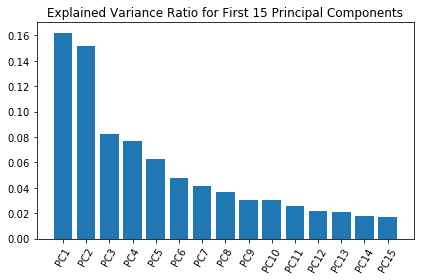

pc1, explained variance ratio 0.16215137291739842


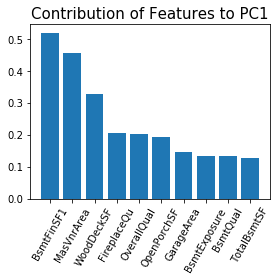

BsmtFinSF1 0.519071474927
MasVnrArea 0.455296733666
WoodDeckSF 0.326762109122
FireplaceQu 0.204291705205
OverallQual 0.201840378625
OpenPorchSF 0.191607512519
GarageArea 0.144691561652
BsmtExposure 0.133512638116
BsmtQual 0.132502736945
TotalBsmtSF 0.12753625892
pc2, explained variance ratio 0.15199061478193243


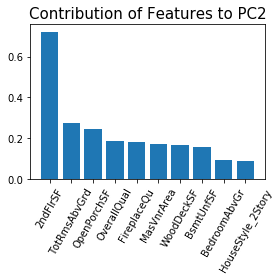

2ndFlrSF 0.721539278215
TotRmsAbvGrd 0.274982306283
OpenPorchSF 0.246673408754
OverallQual 0.188558000716
FireplaceQu 0.182197229493
MasVnrArea 0.173509538264
WoodDeckSF 0.168961259797
BsmtUnfSF 0.158058422706
BedroomAbvGr 0.0961602986808
HouseStyle_2Story 0.0897680053775
pc3, explained variance ratio 0.08217691302261883


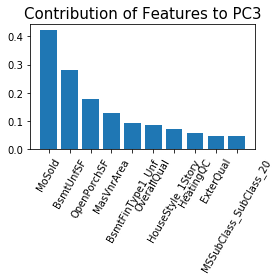

MoSold 0.421038160197
BsmtUnfSF 0.281800155267
OpenPorchSF 0.177253036944
MasVnrArea 0.129920539491
BsmtFinType1_Unf 0.0933619256943
OverallQual 0.0868358874833
HouseStyle_1Story 0.0737874239987
HeatingQC 0.0574333933446
ExterQual 0.0491006233277
MSSubClass_SubClass_20 0.0482415516989


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X_trn)
# show results of pca
print(pca.explained_variance_ratio_)

plt.bar(range(pca.n_components), pca.explained_variance_ratio_)
plt.xticks(
  range(pca.n_components),
  ["PC{}".format(i) for i in range(1, pca.n_components+1)],
  rotation=60)
plt.title("Explained Variance Ratio for First {} Principal Components".format(pca.n_components))
plt.savefig("pca_explained_ratio.png")
plt.show()


for pcID in range(3):
  print("pc{}, explained variance ratio {}".format(
    pcID+1, pca.explained_variance_ratio_[pcID]))
  num_features = 10
  colIDs = pca.components_[pcID].argsort()[::-1][:num_features]
  col_names = dfX.columns[colIDs]
  heights = pca.components_[pcID][colIDs]
  plt.figure(figsize=(4, 4))
  plt.bar(range(num_features), heights, align='center')
  plt.xticks(range(num_features), col_names, rotation=60)
  plt.title("Contribution of Features to PC{}".format(pcID+1), size=15)
  plt.savefig("contribution_to_pc{}.png".format(pcID+1))
  plt.show()
  for fID in pca.components_[pcID].argsort()[::-1][:10]:
    print(dfX.columns[fID], pca.components_[pcID][fID])

In [11]:
## visualize the space of first two principal components

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


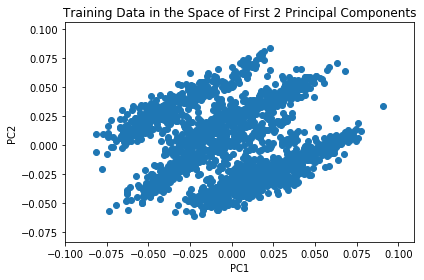

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_trn)
X_trn_trans = pca.transform(X_trn)
plt.scatter(X_trn_trans[:,0], X_trn_trans[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Training Data in the Space of First 2 Principal Components")
plt.savefig("data_pc_space.png")
plt.show()

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_trn)
X_trn = pca.transform(X_trn)
X_val = pca.transform(X_val)
X_tst = pca.transform(X_tst)

### Linear Regression without Regularization

alpha: 0, rmse_val: 0.2229707793562271
Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Training:
RMSE: 0.23456644697733423
R2: 0.6654563502115531


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


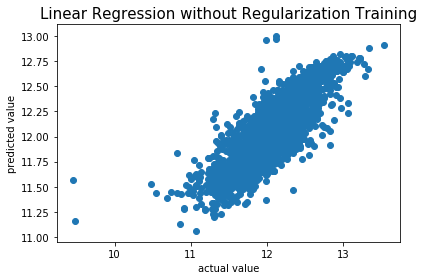

Validation:
RMSE: 0.2229707793562271
R2: 0.7124372404833996


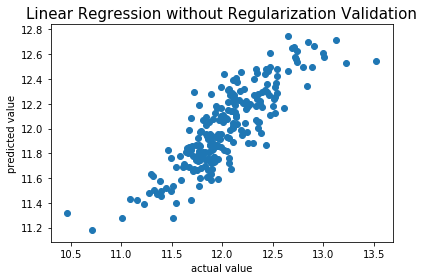

Test:
RMSE: 0.23909726105856938
R2: 0.6629210531242808


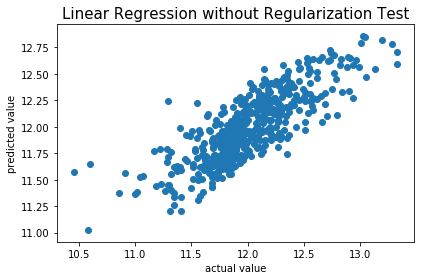

In [12]:
from sklearn import linear_model
alphas = [0]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression without Regularization")

### Ridge Regression

alpha: 1.5e-07, rmse_val: 0.22297078213264443
alpha: 2.25e-07, rmse_val: 0.22297078352085387
alpha: 3.375e-07, rmse_val: 0.22297078560316874
alpha: 5.0625e-07, rmse_val: 0.222970788726643
alpha: 7.593749999999999e-07, rmse_val: 0.22297079341185866
alpha: 1.1390625e-06, rmse_val: 0.22297080043969203
alpha: 1.70859375e-06, rmse_val: 0.2229708109814638
alpha: 2.562890625e-06, rmse_val: 0.2229708267941707
alpha: 3.8443359375e-06, rmse_val: 0.22297085051334165
alpha: 5.766503906249999e-06, rmse_val: 0.222970886092347
alpha: 8.649755859375e-06, rmse_val: 0.22297093946141533
alpha: 1.29746337890625e-05, rmse_val: 0.2229710195162784
alpha: 1.946195068359375e-05, rmse_val: 0.22297113960140896
alpha: 2.9192926025390623e-05, rmse_val: 0.2229713197354859
alpha: 4.3789389038085936e-05, rmse_val: 0.22297158995095784
alpha: 6.56840835571289e-05, rmse_val: 0.22297199530646666
alpha: 9.852612533569336e-05, rmse_val: 0.2229726034124012
alpha: 0.00014778918800354004, rmse_val: 0.2229735157347939
alpha: 0

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


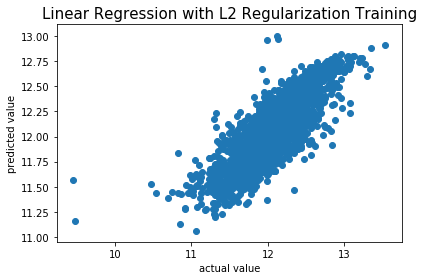

Validation:
RMSE: 0.22297078213264443
R2: 0.7124372333219748


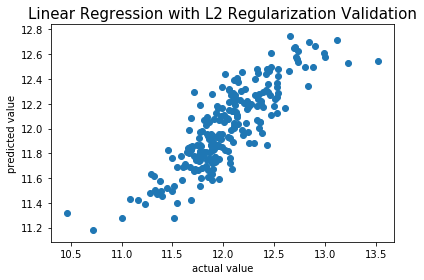

Test:
RMSE: 0.23909726206857018
R2: 0.6629210502764857


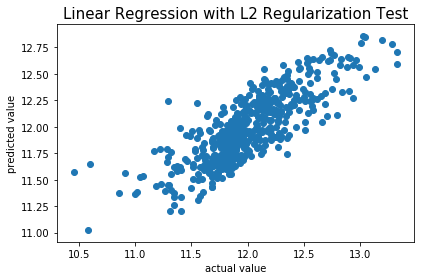

In [14]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression with L2 Regularization")

### Lasso Regression

alpha: 1.5e-07, rmse_val: 0.22297238832107377
alpha: 2.25e-07, rmse_val: 0.22297319312103261
alpha: 3.375e-07, rmse_val: 0.22297440071788352
alpha: 5.0625e-07, rmse_val: 0.22297621300619838
alpha: 7.593749999999999e-07, rmse_val: 0.22297893344795558
alpha: 1.1390625e-06, rmse_val: 0.22298301863130748
alpha: 1.70859375e-06, rmse_val: 0.22298915657735646
alpha: 2.562890625e-06, rmse_val: 0.2229983863792319
alpha: 3.8443359375e-06, rmse_val: 0.22301228256159764
alpha: 5.766503906249999e-06, rmse_val: 0.22303324264126553
alpha: 8.649755859375e-06, rmse_val: 0.2230649432468967
alpha: 1.29746337890625e-05, rmse_val: 0.2231130799848921
alpha: 1.946195068359375e-05, rmse_val: 0.22318660230537685
alpha: 2.9192926025390623e-05, rmse_val: 0.22329984641252534
alpha: 4.3789389038085936e-05, rmse_val: 0.22347636322345169
alpha: 6.56840835571289e-05, rmse_val: 0.22375606466889056
alpha: 9.852612533569336e-05, rmse_val: 0.2242090664113002
alpha: 0.00014778918800354004, rmse_val: 0.22495276034977302
al

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


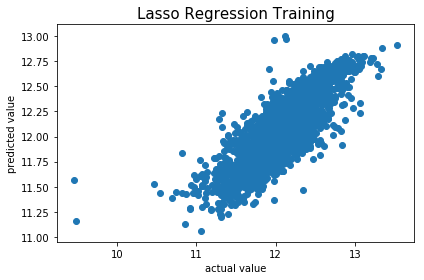

Validation:
RMSE: 0.22297238832107377
R2: 0.712433090342812


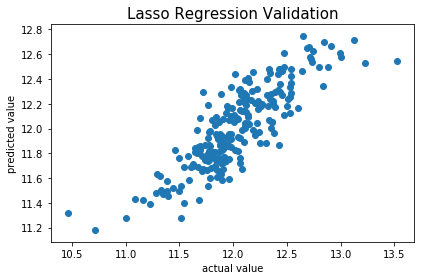

Test:
RMSE: 0.23909782777079958
R2: 0.6629194552223452


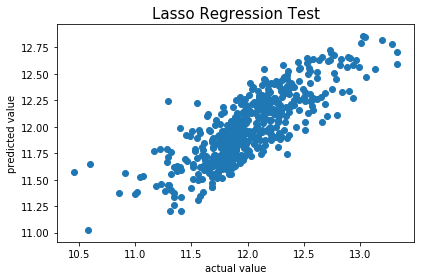

In [15]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Lasso(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Lasso Regression")

### SVR

C: 3.000e-03, epsilon: 1.200e-03, rmse_val: 0.415160716928425
C: 9.000e-03, epsilon: 1.200e-03, rmse_val: 0.41221094692255567
C: 2.700e-02, epsilon: 1.200e-03, rmse_val: 0.4033394526057053
C: 8.100e-02, epsilon: 1.200e-03, rmse_val: 0.378672438351256
C: 2.430e-01, epsilon: 1.200e-03, rmse_val: 0.3234213356947543
C: 7.290e-01, epsilon: 1.200e-03, rmse_val: 0.2612453037185589
C: 2.187e+00, epsilon: 1.200e-03, rmse_val: 0.23505650956785515
C: 6.561e+00, epsilon: 1.200e-03, rmse_val: 0.2290285981967255
C: 1.968e+01, epsilon: 1.200e-03, rmse_val: 0.22701355621393673
C: 5.905e+01, epsilon: 1.200e-03, rmse_val: 0.22605586722893242
C: 1.771e+02, epsilon: 1.200e-03, rmse_val: 0.22580595528857694
C: 5.314e+02, epsilon: 1.200e-03, rmse_val: 0.22611724515470538
C: 1.594e+03, epsilon: 1.200e-03, rmse_val: 0.22687351248111096
SVR(C=177.147, cache_size=200, coef0=0.0, degree=3, epsilon=0.0012,
  gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)
Training:
RMSE: 0.235

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


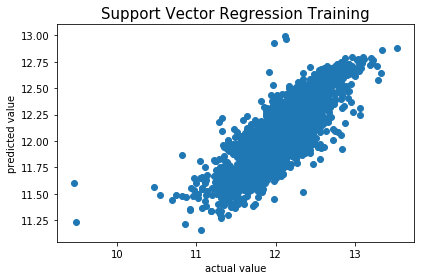

Validation:
RMSE: 0.22580595528857694
R2: 0.7050777612084668


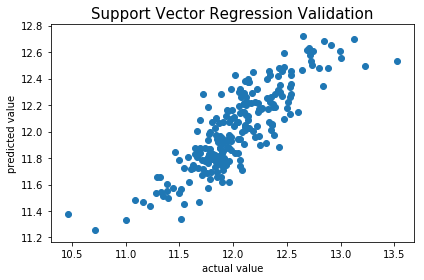

Test:
RMSE: 0.24039282471861206
R2: 0.6592581889399773


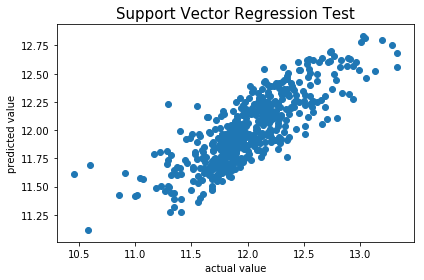

In [18]:
from sklearn.svm import SVR
Cs = [0.001*(3**i) for i in range(1, 14)]
epsilons = [0.0012]

best_rmse = None
best_model = None
for C in Cs:
  for epsilon in epsilons:
    model = SVR(kernel='rbf', C=C, epsilon=epsilon)
    model.fit(X_trn, y_trn)
    rmse_val = metric.rmse(y_val, model.predict(X_val))
    print("C: {:.3e}, epsilon: {:.3e}, rmse_val: {}".format(C, epsilon, rmse_val))
    if best_rmse is None or rmse_val < best_rmse:
      best_rmse = rmse_val
      best_model = model
      
print(best_model)
eval_model(best_model, "Support Vector Regression")

### Random Forest

n_estimators: 1000, rmse_val: 0.18884250414673584
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Training:
RMSE: 0.07676520064630184
R2: 0.9641697539659029


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


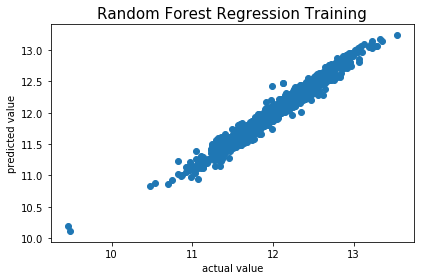

Validation:
RMSE: 0.18884250414673584
R2: 0.7937299184161115


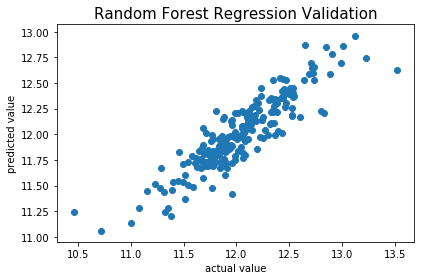

Test:
RMSE: 0.2130794759132878
R2: 0.7322893392556074


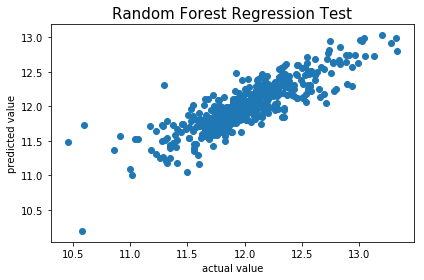

In [19]:
from sklearn.ensemble import RandomForestRegressor
n_estimators_list = [1000]

best_rmse = None
best_model = None

for n_estimators in n_estimators_list:
  model = RandomForestRegressor(n_estimators=n_estimators)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("n_estimators: {}, rmse_val: {}".format(n_estimators, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model
    
print(best_model)
eval_model(best_model, "Random Forest Regression")